# CS 449 Final Project Proposal

Due: April 21, 2023 at 11:59pm

## Names and Net IDs

>Hong Wang: hyw6229 \
Nino Maruszewski: nvm6986 \
Andrew Pulver: ajp2637 \
Jordan Checkoff: jbc6837

## Abstract

*Your abstract should be two or three sentences describing the motivation
for your project and your proposed methods.*

>Our final project seeks to build a convolutional neural network to classify satellite images from the resisc45 dataset. We will compare this to a logistic regression model, CNN, and the results of research papers that worked on the dataset.

## Introduction

*Why is this project interesting to you? Describe the motivation for pursuing this project. Give a specific description of your data and what machine learning task you will focus on.*

>Being able to automatically classify satellite images would make it much more efficient to survey an area of land to identify and count various features. This has a wide variety of applications, including town planning and disaster relief. Furthermore, this information could be useful for bigger models that attempt to find correlations between these features and some other statistic about a given area.

## Describe your dataset(s)

*List the datasets you plan to use, where you found them, and what they contain. Be detailed! For each dataset, what does the data look like? What is the data representation? (e.g., what resolution of images? what length of sequences?) How is the data annotated or labeled? Include citations for the datasets. Include at least one citation of previous work that has used your data, or explain why no one has used your data before.*


>We are using the resisc45 dataset which was found from the tensorflow dataset library. It contains 31,500 satellite images (jpg format) that are 256x256 pixels which contains RGB of their labeled classes. The dataset has 45 different classes with each class containing 700 images. The dataset in the code is represented by three 2d tensor arrays containing their RGB values at position (x, y). The data is labeled by not only the folder they are in, but also their image name. For example, one image is named "snowberg_609.jpg" in the snowberg file. 
>
>This dataset is used in the category of Remote Sensing Image Scene Classification (RESISC) produced by Northwestern Polytechnical University (NWPU). According to [wikipedia](https://en.wikipedia.org/wiki/Remote_sensing), remote sensing is the acquisition of information about an object without making contact. In our case, the remote sensing are the satellite images.

### Citation

>Dataset Citation \
&nbsp; “Resisc45 | TensorFlow Datasets.” TensorFlow, www.tensorflow.org/datasets/catalog/resisc45. Accessed 22 Apr. 2023.

>Citation of previous work \
&nbsp; Cheng, Gong, Junwei Han, and Xiaoqiang Lu. “Remote Sensing Image Scene Classification: Benchmark and State of the Art.” Proceedings of the IEEE 105, no. 10 (October 2017): 1865–83. https://doi.org/10.1109/jproc.2017.2675998.

## Load your dataset(s)

*Demonstrate that you have made at least some progress with getting your
dataset ready to use. Load at least a few examples and visualize them
as best you can*

Using downloaded RESISC45.


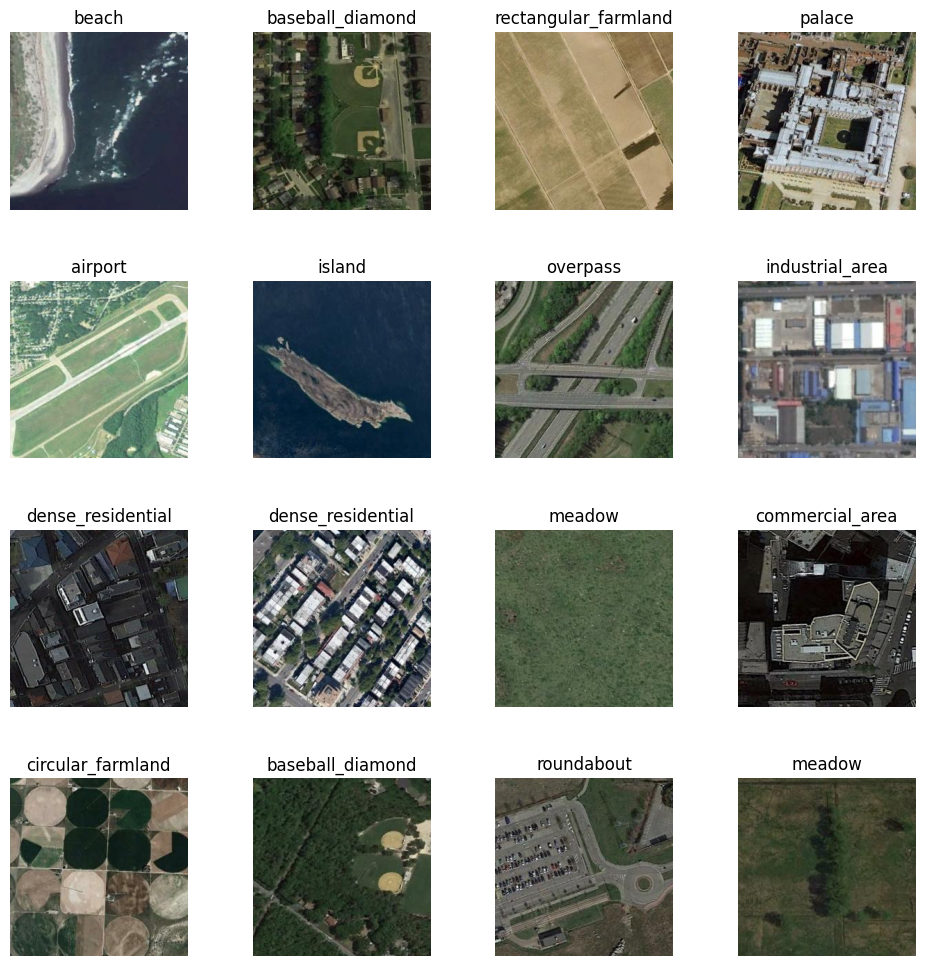

In [2]:
import os
from pathlib import Path

import torch
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder

import matplotlib.pyplot as plt

import gdown

RESISC45_DIR = Path(".") / "NWPU-RESISC45"

# Download the RESISC45 dataset if needed
# We *should* do this right, but this workss
if not RESISC45_DIR.exists():
    print("Downloading RESISC45.")
    
    gdown.download(
        id="1nd0R9iljzkWd7Hhfyp2tH55KxAsKrzYj",
        output="NWPU-RESISC45.rar",
        quiet=False,
    )
    os.system("7z x NWPU-RESISC45.rar")
    os.system("rm NWPU-RESISC45.rar")
else:
    print("Using downloaded RESISC45.")
    

# Define the parameters for data loading
image_size = (256, 256)
batch_size = 32

# Load the Resisc45 dataset using ImageFolder
train_dataset = ImageFolder(RESISC45_DIR)

# Display the images from the dataset
fig, axes = plt.subplots(4, 4, figsize=(12, 12))
axes = axes.ravel()
for i in range(16):
    sample = torch.randint(0, 31500, size=(1,)).item()
    img, label = train_dataset[sample]
    axes[i].imshow(img)
    axes[i].set_title(train_dataset.classes[label])
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()

## Small dataset

*Many deep learning datasets are very large, which is helpful for training powerful models but makes debugging difficult. For your update, you will need to construct a small version of your dataset that contains 200-1000 examples and is less than 10MB. If you are working with images, video, or audio, you may need to downsample your data. If you are working with text, you may need to truncate or otherwise preprocess your data.*

*Give a specific plan for how you will create a small version of one dataset you'll use that is less than 10MB in size. Mention the current size of your dataset and how many examples it has and how those numbers inform your plan.*

> Our current size is 405 MB with 31,500 images. Base on these numbers, we get that we can sample around 17 images per class where there is 45 classes to have a small dataset under 10 MB. To make it easier, we will sample 15 images per class for 675 images total.

In [6]:
# Plan to split dataset
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

data_transforms = transforms.Compose([
    transforms.Resize(image_size),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # ImageNet normalization
])

downsize_dataset = ImageFolder(RESISC45_DIR, transform=data_transforms)

target_array = downsize_dataset.targets

train_indices, test = train_test_split(range(len(target_array)), train_size=675, random_state=69, stratify=target_array)

train_sampler = torch.utils.data.sampler.SubsetRandomSampler(train_indices)

train_loader = DataLoader(downsize_dataset, batch_size = 1, sampler=train_sampler, num_workers=4)

In [16]:
# This will print out the downsize dataset where each class has 15 images 
# 15*45 = 675 which is shown below with idx of 674 because of 0 indexing
labels = set()
for dp in train_loader:
    labels.add(dp[1].item())
    
print(f"Num train labels: {len(labels)}")

Num train labels: 45
Labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44}


In [13]:
print(f"Num train examples: {len(train_loader)}")

Num train examples: 675


## Methods

*Describe what methods you plan to use. This is a deep learning class, so you should use deep learning methods. Cite at least one or two relevant papers. What model architectures or pretrained models will you use? What loss function(s) will you use and why? How will you evaluate or visualize your model's performance?*

> We will use Convolutional Neural Networks as our image classification model. We will fine-tune our model weights, and experiment with using different values for padding, stride, and dilation. We also hope to use Cross Entropy Loss for our loss function. This loss function is easy for a neural network performing classification to learn on. We would also like to try logistic regression and a decision tree as baseline models. Time permitting, we may also try a fully connected MLP to see if, with enough coaxing, it can learn this dataset.

> Citation: Cheng, Gong, Junwei Han, and Xiaoqiang Lu. “Remote Sensing Image Scene Classification: Benchmark and State of the Art.” Proceedings of the IEEE 105, no. 10 (October 2017): 1865–83. https://doi.org/10.1109/jproc.2017.2675998.

## Deliverables

*Include at least six goals that you would like to focus on over the course of the quarter. These should be nontrivial, but you should have at least one and hopefully both of your "Essential" goals done by the project update, due in mid-May. Your "Stretch" goals should be ambitious enough such that completing one is doable, but completing both this quarter is unlikely.*

### Essential Goals
- (At least two goals here. At least one should involve getting a neural network model running.)

> 1. We will use logistic regression as our baseline model 
> 2. We will create a simple CNN architecture to compare against our baseline models


### Desired Goals
- (At least two goals here. Completing these goals should be sufficient for you to say your project was a success.)

> 1. See how data augmentation (i,e rotating the images) affects our baseline CNN models performance
> 2. Take satellite images of Evanston and correctly classify image segments. Evanston data is available through the Google Maps API. We will set the resolution, zoom, and image size through the Google Maps API to be similar to that of our training data. These parameters can be set using the Google Maps API. We will manually label the images. We will collect satellite images from both summer and winter for comparison.
> 3. We will explore changes in the architecture and parameters of the CNN, including number of layers, layer sizes, filter size, stride, padding, and different activation functions, to see which set of parameter provides the best performance. We will start with a filter size of 3x3 and increase the filter size by 2x2 to find the optimal size. We will test RELU, sigmoid, and tanh activation functions.

###  Stretch Goals
- (At least two goals here. These should be ambitious extensions to your desired goals. You can still get full points without completing these.)

> 1. We will create new images using a GAN technique to increase the size of our dataset and improve the model.
> 2. We will attempt an adversarial attack on our model, then train our model on perturbed images, and then attempt an adversarial attack again to check for greater robustness.

## Hopes and Concerns

*What are you most excited about with this project? What parts, if any, are you nervous about? For example:*

Hopes:

> 1. We hope to make predictions that are somewhat accurate.
> 2. We hope that our model will be generalizable such that if we were to input other satellite images (such as those from the City of Evanston) we would also be able to properly classify these images.

Concerns: 

> 1. We’re concerned that we don’t have enough images to create an image classification model that is very confident in its classifications.
> 2. We’re concerned that there might be too few image classes (there are 45 classes). 

## References

*Cite the papers or sources that you used to discover your datasets and/or models, if you didn't include the citation above.*

>Where we originally found the dataset: \
&nbsp; Cole, Robin M. “Satellite-Image-Deep-Learning.” GitHub, 22 Apr. 2023, github.com/satellite-image-deep-learning/techniques. Accessed 22 Apr. 2023.